# Introduction

In this tutorial we will take images at 1m resolution, which are (10012, 10012) in shape, split them into smaller images (2016, 2016), and thus create dataset. 

In [1]:
import os
import sqlite3
import torch

from levee_hunter.dataset_images_choice import interactive_dataset_creation
from levee_hunter.database_management import add_file_to_db
from levee_hunter.paths import find_project_root
from levee_hunter.utils import find_splits
from levee_hunter.paths import check_if_file_exists

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:17: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(


In [2]:
# This is for database creation
tifs_path = find_project_root() / "data/raw/w4-Lidar/1m_resolution"


def reset_database(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("DROP TABLE IF EXISTS files")

    conn.commit()
    conn.close()


def create_database(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Create the files table (if not exists)
    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS files (
        file_id TEXT PRIMARY KEY,
        path TEXT NOT NULL,
        state TEXT NOT NULL CHECK (state IN ('unused', 'validation', 'train_test'))
    )
    """
    )

    conn.commit()


db_path = find_project_root() / "data/files_db/1m_2016.db"
db_path

PosixPath('/share/gpu5/pmucha/fathom/levee-hunter/data/files_db/1m_2016.db')

In [3]:
tif_files = [file for file in os.listdir(tifs_path) if file.endswith(".tif")]
len(tif_files)

6

In [4]:
import rioxarray

# example of an image
img = rioxarray.open_rasterio(tifs_path / tif_files[0])
img.shape

(1, 10012, 10012)

In [5]:
find_splits(10012, 2016, max_overlap_frac=0.1)[:6]

n, overlap, total_covered


[(5, 17, 10012),
 (5, 18, 10008),
 (5, 19, 10004),
 (5, 20, 10000),
 (5, 21, 9996),
 (5, 22, 9992)]

In [6]:
reset_database(db_path)
create_database(db_path)
check_if_file_exists(db_path)

True

In [7]:
conn = sqlite3.connect(db_path)
for path_to_new_file in tif_files:
    new_file_id = add_file_to_db(conn, path_to_new_file)

File USGS_one_meter_x61y424_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_1m_x62y432_CA_NoCAL_Wildfires_B5a_2018.tif added successfully with state 'unused'.
File USGS_one_meter_x63y423_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_one_meter_x63y424_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_1m_x63y427_CA_NoCAL_Wildfires_B5a_2018.tif added successfully with state 'unused'.
File USGS_1m_x62y428_CA_NoCAL_Wildfires_B5a_2018.tif added successfully with state 'unused'.


In [8]:
# Those are the inputs we will be using for the dataset creation
print(db_path)
levees_file = "../data/raw/w3-Levees/levees.gpkg"
# resolution = "1m"
# size = 2016
# overlap = 17

/share/gpu5/pmucha/fathom/levee-hunter/data/files_db/1m_2016.db


Processing file 1/6
File ID: f30216fb50
Filename: USGS_one_meter_x61y424_CA_Sacramento_2017.tif
Processing part 3/24


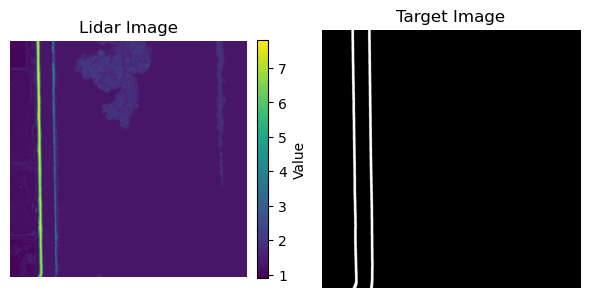

Reverting file f30216fb50 back to 'unused'...
File f30216fb50 successfully moved to 'unused'.
Releasing database lock...


SystemExit: 0

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
# UI Elements
# output = widgets.Output()
# Display UI
# display(output)

interactive_dataset_creation(
    db_path=db_path,
    levees_file_path=levees_file,
    resolution="1m",
    size=2016,
    overlap=17,
)

# Code Below 

Works only after first dataset has been saved, user can play around with it to test if it works as expected etc.

In [ ]:
train_test_dataset = torch.load(
    "../data/intermediate/1m_2016/train_test.pth", weights_only=False
)
bad_dataset = torch.load("../data/intermediate/1m_2016/bad.pth", weights_only=False)

In [ ]:
len(train_test_dataset), len(bad_dataset)

(36, 2)

In [ ]:
train_test_dataset.weights

tensor([1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2.])

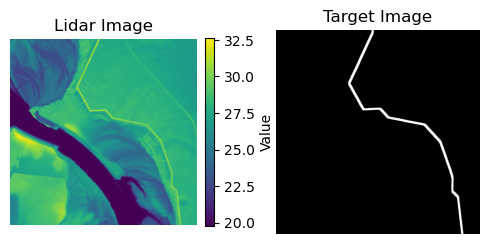

In [ ]:
train_test_dataset.plot(2, figsize=(5, 5))